# Preprocessing 3

In this notebook, we will process the data by using preprocessing method 1, as shown below:
- Import the data from Preprocessing 1;
- Select features by PCA.

Import the libraries:

In [1]:
import numpy as np 
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random
import os
import gc
from ast import literal_eval
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Read Input

In [2]:
df_train = pd.read_csv('train_P1.csv', dtype={'fullVisitorId': 'str'})
df_test = pd.read_csv('test_P1.csv', dtype={'fullVisitorId': 'str'})

In [3]:
Id_train = df_train['fullVisitorId']
Id_test  = df_test['fullVisitorId']

y_train = df_train['totals.transactionRevenue']
X_train = df_train.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)
y_test = df_test['totals.transactionRevenue']
X_test = df_test.drop(['fullVisitorId', 'totals.transactionRevenue'], axis=1)

del df_train
del df_test

## 2. PCA

In [4]:
# standarization:
col_name = X_train.columns

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = col_name)
X_test = pd.DataFrame(scaler.transform(X_test), columns = col_name)

0.9564202597390375


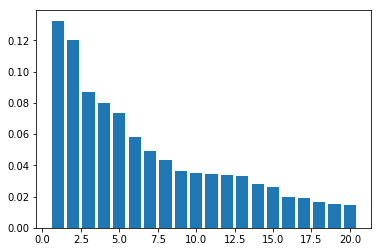

In [5]:
pca = PCA(n_components=20)
pca.fit(X_train)

#print(pca.components_)
#print(pca.explained_variance_ratio_)  
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [6]:
Xpca_train=pd.DataFrame(pca.fit_transform(X_train))
Xpca_test=pd.DataFrame(pca.fit_transform(X_test))
Xpca_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.012027,3.338134,0.295667,-0.456715,0.246142,0.286117,1.491805,1.592432,0.363003,0.957084,-0.009980,-0.854108,1.748194,1.208618,-0.419929,0.325077,-0.665311,-1.678565,-0.288825,1.680678
1,-0.520369,6.141752,0.537313,1.747801,0.917086,0.583966,1.176262,-1.317415,-1.345987,0.442763,-0.162727,-0.230581,1.759808,2.286625,0.146474,-0.453808,0.318238,-0.494521,0.546200,-0.614547
2,0.088720,3.572744,2.050120,-0.831300,0.117791,-1.118027,1.525533,0.189378,0.937600,0.622872,-0.345613,-0.769959,1.804840,1.472383,-0.122623,0.035224,-0.519791,-0.483975,-1.121518,1.241482
3,-0.448192,4.177313,2.440956,0.620565,-0.425878,-0.428098,1.681464,-1.148475,-1.773203,0.621575,0.112697,-0.401945,1.770013,1.621897,0.446804,-0.198885,0.302614,-0.263200,-1.208721,1.292224
4,-0.652444,5.440682,0.158325,1.690659,0.189841,0.525211,1.180414,-0.763376,-1.583939,0.621903,-0.071904,-0.483455,1.675751,1.798462,0.212455,-0.296666,0.131880,-0.097542,-0.969261,0.965505


## 3. Output Preprocessed Data

In [7]:
Xpca_train['fullVisitorId'] = Id_train
Xpca_test['fullVisitorId'] = Id_test
Xpca_train['totals.transactionRevenue'] = y_train
Xpca_test['totals.transactionRevenue'] = y_test

df_train=Xpca_train
df_test=Xpca_test

In [ ]:
df_train.to_csv('train_P3.csv', index=False)
print('Output preprocessed training set done.')
df_test.to_csv('test_P3.csv', index=False)
print('Output preprocessed test set done.')